In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('table2.csv')
Edens_demag = df[r"Edens_demag.region5 (J/m3)"]
Edens_exch = df[r"Edens_exch.region5 (J/m3)"]
# 5 cell sizes
cellSize = list(np.arange(2e-9, 12e-9, 2e-9))
# 361 angles per cell size
angle = list(np.arange(0, 370, 1)) 
print(np.size(Edens_demag))

1805


In [ ]:
split_Edens_demag = np.split(Edens_demag, 5)
split_Edens_exch = np.split(Edens_exch, 5)
min_angles = []

for arr in split_Edens_demag:
    min_angles.append(angle[np.argmin(arr)])

min_angles = np.array(min_angles)

min_angles_diff = min_angles - min_angles[0]


[0 0 0 0 0]


C:\Users\sm70\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [14]:
min_Edens_demag = []
for arr in split_Edens_demag:
    min_Edens_demag.append(np.min(arr))


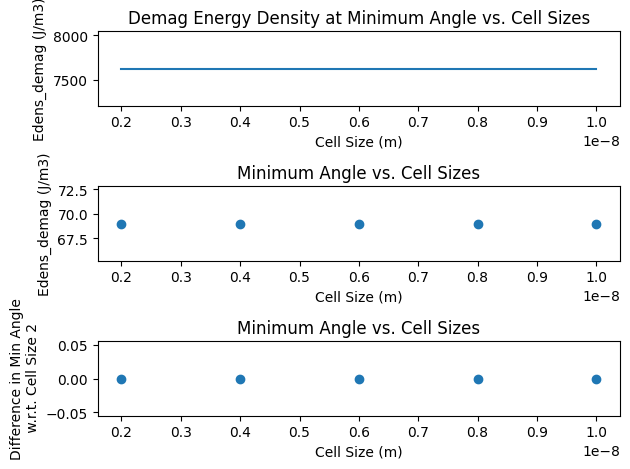

In [31]:
fig, ax = plt.subplots(3)
ax[0].plot(cellSize, min_Edens_demag)
ax[0].set_xlabel("Cell Size (m)")
ax[0].set_ylabel("Edens_demag (J/m3)")
ax[0].set_title("Demag Energy Density at Minimum Angle vs. Cell Sizes")
ax[1].scatter(cellSize, min_angles)
ax[1].set_xlabel("Cell Size (m)")
ax[1].set_ylabel("Edens_demag (J/m3)")
ax[1].set_title("Minimum Angle vs. Cell Sizes")

ax[2].scatter(cellSize, min_angles_diff)
ax[2].set_xlabel("Cell Size (m)")
ax[2].set_ylabel("Difference in Min Angle\n w.r.t. Cell Size 2")
ax[2].set_title("Minimum Angle vs. Cell Sizes")
fig.tight_layout()
